# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [218]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [219]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [220]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [221]:
# Write your code here
df.shape

(1898, 9)

### Observations:
There are 1898 rows(excluding the header row) and there are 9 columns present in the data
The number of rows counted exclude the first row in the document since it does not correspond to an order placed by a customer.
We dont use parenthesis because it's a method and not a function

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [222]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 3 datatypes in the different columns of the dataset.
We have 1 float, 4 int(integers) and 4 object. 
When we see object as a data type it mostly includes text or sting values but can also include various types of data.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [223]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [224]:
# Write your code here
df.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum time it takes for food to be prepared is 20.0
The average time it takes for food to be prepared is 27.371970 
The maximum time it takes fro food to be prepared is 35.0

### **Question 5:** How many orders are not rated?

In [225]:
# Write the code here
(df['rating']=='Not given').sum()

736

#### Observations:
There are 736 orders that have not been rated.

### Exploratory Data Analysis (EDA) 

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

**Finding uniue values**

In [226]:
# Write the code here
print ("The unique values of the order ID column are:",df['order_id'].nunique() )
print ("The unique values of the customer ID column are:",df['customer_id'].nunique() )
print ("The unique values of the restaurant_name column are:",df['restaurant_name'].nunique() )
print ("The unique values of the cuisine_type column are:",df['cuisine_type'].nunique() )
print ("The unique values of the rating column are:",df['rating'].nunique() )

The unique values of the order ID column are: 1898
The unique values of the customer ID column are: 1200
The unique values of the restaurant_name column are: 178
The unique values of the cuisine_type column are: 14
The unique values of the rating column are: 4


**Creating histograms and boxplots for continuous variables**

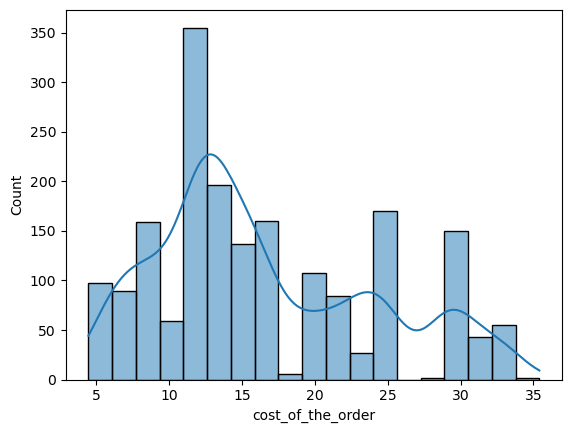

<function matplotlib.pyplot.show(close=None, block=None)>

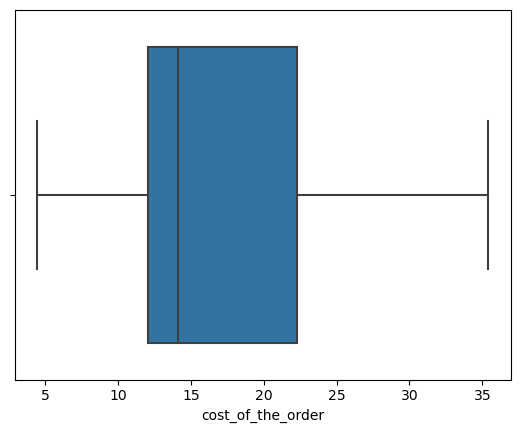

In [227]:
sns.histplot(data=df,x='cost_of_the_order',kde=True) #Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') #Boxplot for the cost of order
plt.show

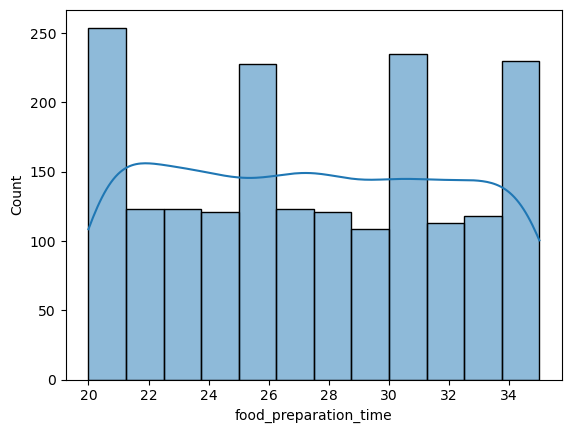

<function matplotlib.pyplot.show(close=None, block=None)>

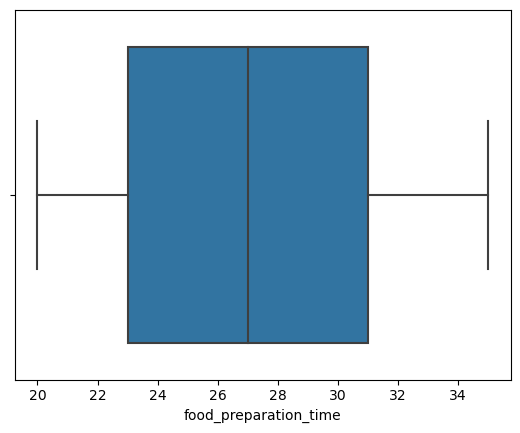

In [228]:
sns.histplot(data=df,x='food_preparation_time',kde=True) #Histogram for the food preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') #Boxplot for the food preparation time
plt.show

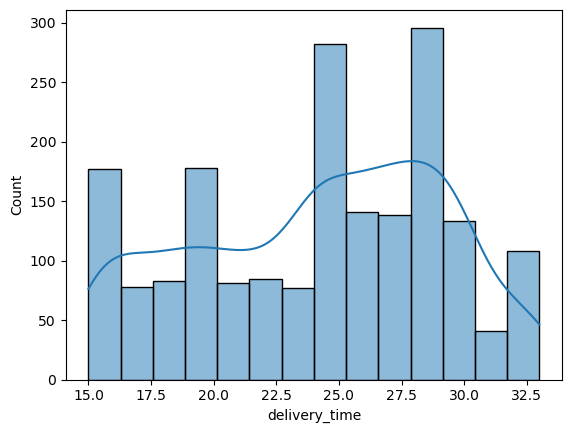

<function matplotlib.pyplot.show(close=None, block=None)>

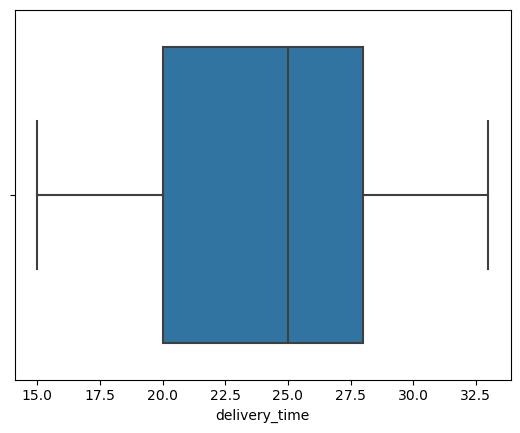

In [229]:
sns.histplot(data=df,x='delivery_time',kde=True) #Histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') #Boxplot for the delivery time
plt.show

**Creating Bargraphs for the categorical variables using countplot**

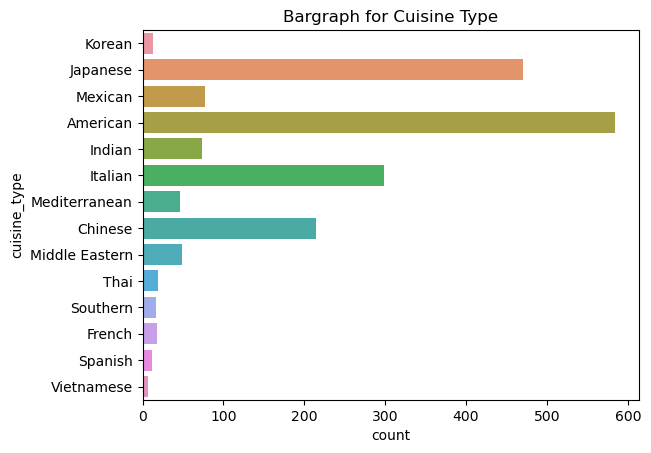

In [230]:
sns.countplot(data=df, y="cuisine_type") #Countplot for cuisine type
plt.title("Bargraph for Cuisine Type")
plt.show()

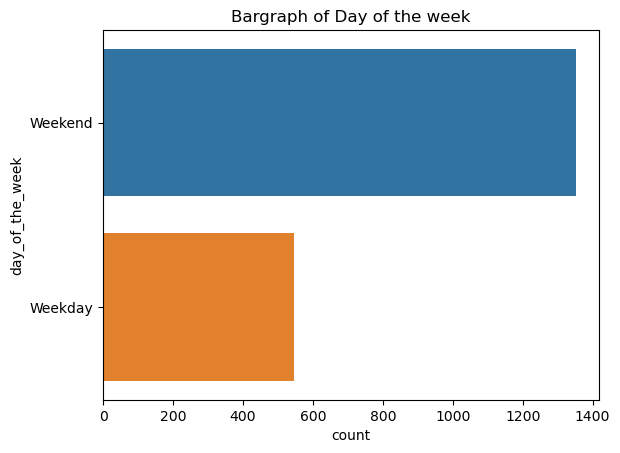

In [231]:
sns.countplot(data=df, y="day_of_the_week") #Countplot for the day of the week
plt.title("Bargraph of Day of the week")
plt.show()

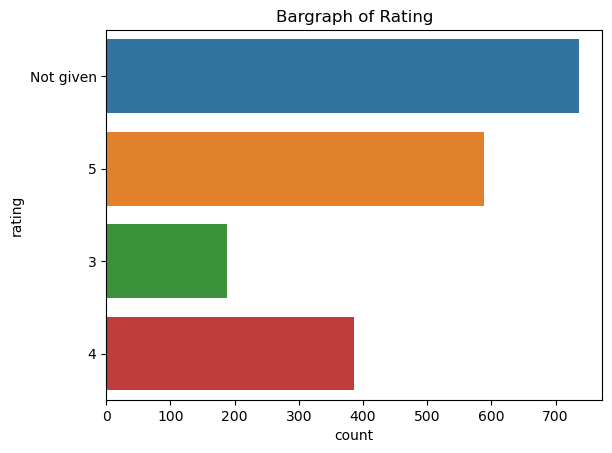

In [232]:
sns.countplot(data=df, y="rating") #Countplot for the rating
plt.title("Bargraph of Rating")
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [233]:
# Write the code here
Top_restaurants=df["restaurant_name"].value_counts().head()
print(Top_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
The top 5 restaurants are the Shake Shack restaurant with a total number of 219 orders received, the Meatball Shop restaurant with a total number of 132 orders received, the Blue Ribbon Sushi restaurant with a total number of 119 orders received, the Blue Ribbon Fried Chicken restaurant with a total number of 96 orders received and the Parm restaurant with a total number of 68 orders received.

### **Question 8**: Which is the most popular cuisine on weekends?

In [234]:
# Write the code here
Weekends_data=df[df["day_of_the_week"]=="Weekend"]
Most_popular_cuisine=Weekends_data["cuisine_type"].value_counts()
print (Most_popular_cuisine)

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


#### Observations:
The most popular cuisine on the weekend is the American cuisine with a total number of 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [235]:
# Write the code here
No_above_20=(df["cost_of_the_order"]>20).sum()
Total_orders=len(df)
Percentage=(No_above_20/Total_orders)*100
print("The percentage of the orders that cost more than 20 dollars is",Percentage,"%")

The percentage of the orders that cost more than 20 dollars is 29.24130663856691 %


#### Observations:
The percentage of the orders that cost more than 20 dollars is 29.24% (Rounded off to two decimal places)

### **Question 10**: What is the mean order delivery time?

In [236]:
# Write the code here
df["delivery_time"].mean()

24.161749209694417

#### Observations:
The mean order deliver time is 24.16 (Rounded off to two decimal places)

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [237]:
# Write the code here
Frequent_customers=df["customer_id"].value_counts().head(3)
print(Frequent_customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The top 3 most frequent customers have the customer id numbers: 52832 who has placed a total number of 13 orders, 47440 who has placed a total numer of 10 orders and 83287 who has placed a total number of 9 orders therefore these 3 customers will be given a 20% discount voucher.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

**Cuisine type vs Cost of order**

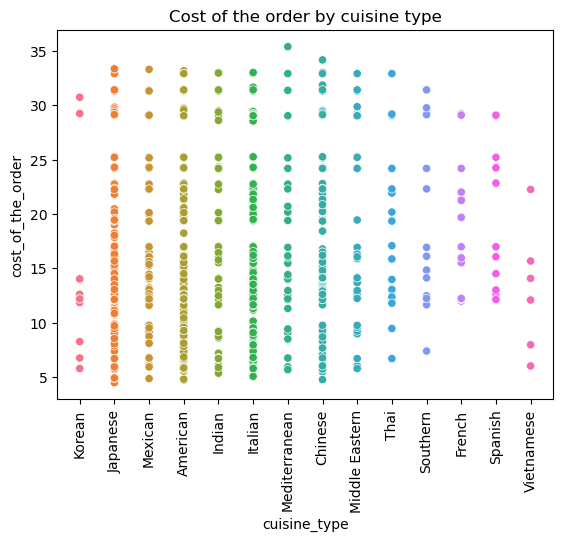

In [238]:
# Relationship between cost of the order and cuisine type
sns.scatterplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="cuisine_type", legend=False)
plt.title("Cost of the order by cuisine type")
plt.xticks(rotation=90)
plt.show()

**Cuisine type vs Food preparation time**

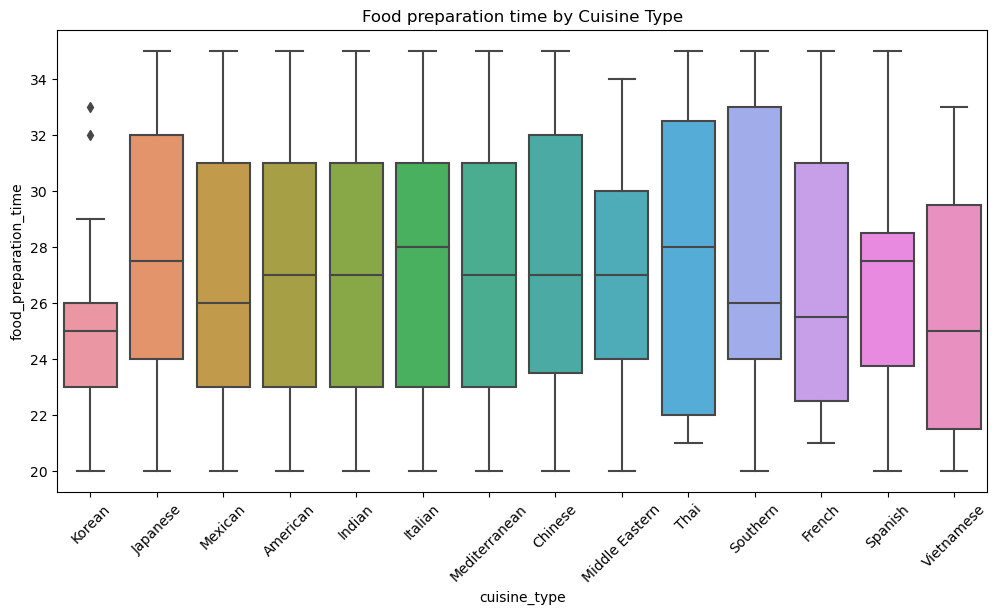

In [239]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Food preparation time by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

**Pair plot of numerical varables**

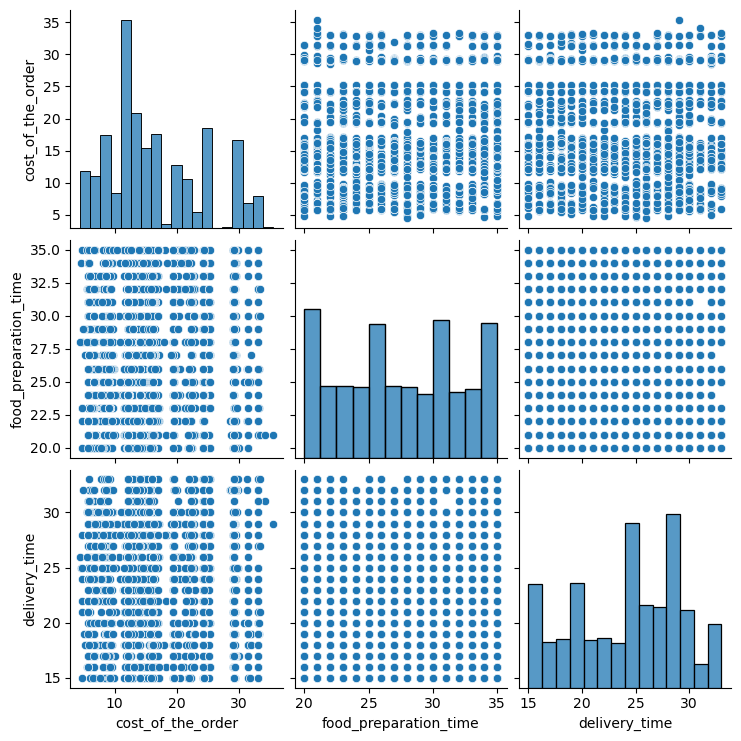

In [240]:
# Relationship between numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.show()

**Food preparation time vs Day of the week**

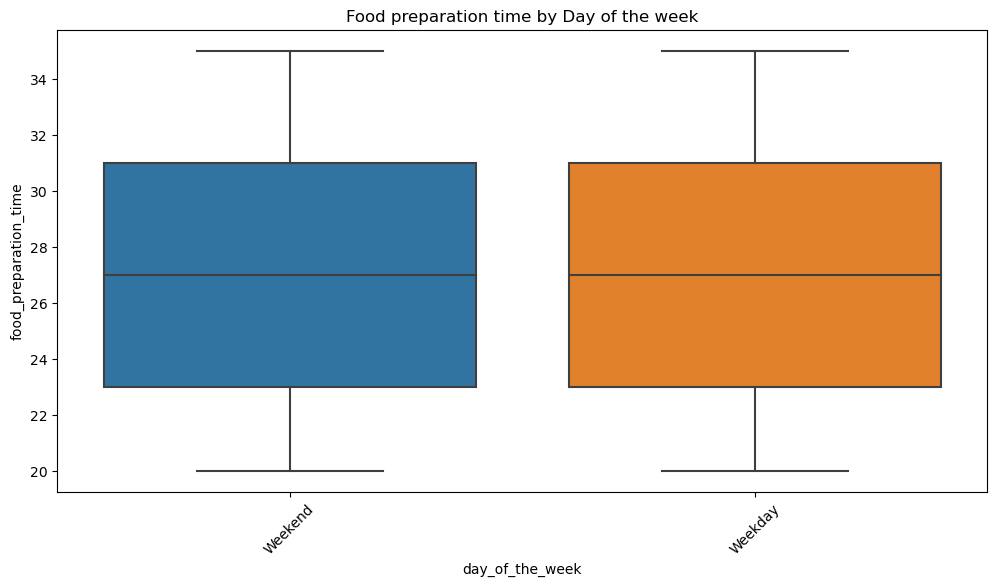

In [241]:
# Relationship between food preparation time and day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Food preparation time by Day of the week')
plt.xticks(rotation=45)
plt.show()

**Delivery time vs Day of the week**

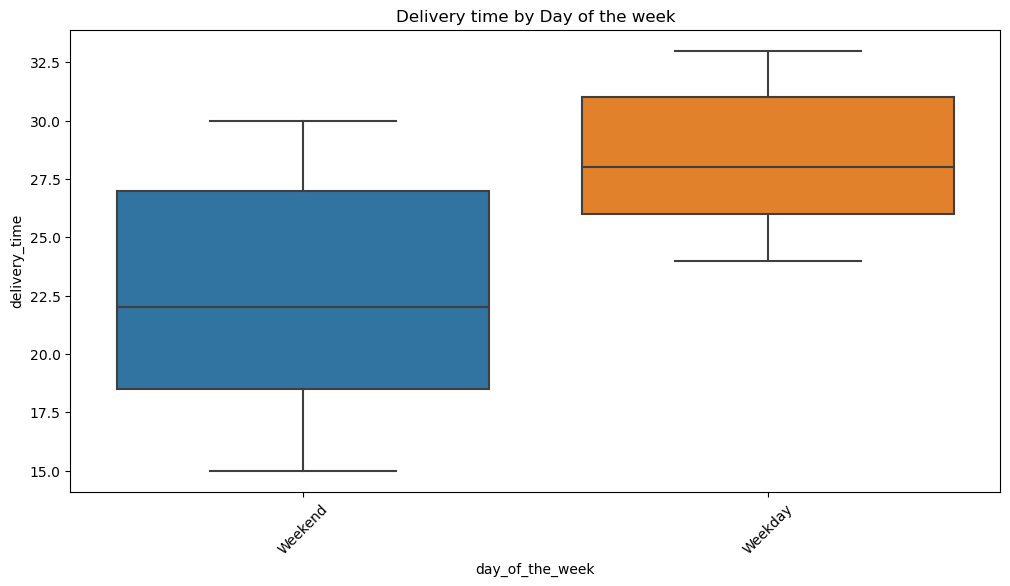

In [242]:
# Relationship between delivery time and day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery time by Day of the week')
plt.xticks(rotation=45)
plt.show()

**Delivery time vs rating**

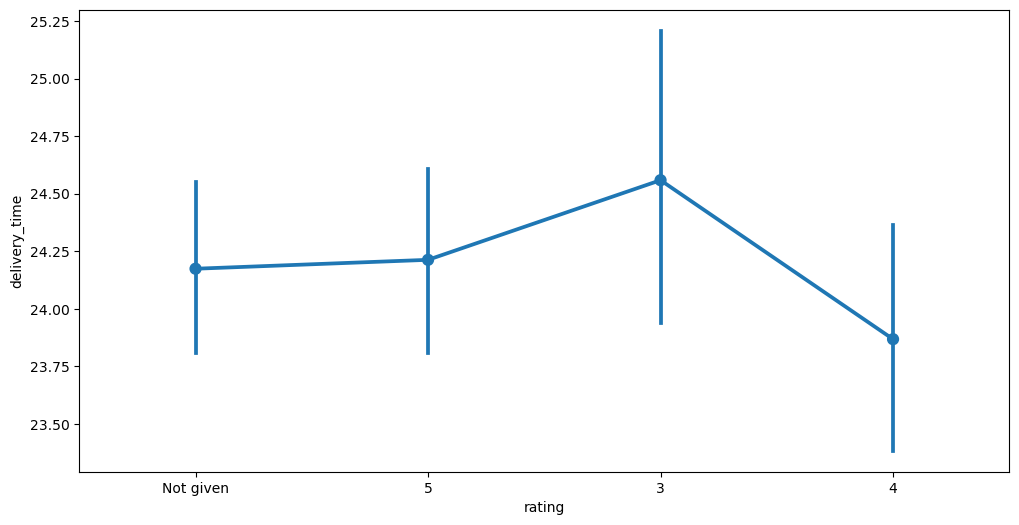

In [243]:
# Relationship between rating and delivery time
plt.figure(figsize=(12,6))
sns.pointplot(x='rating', y='delivery_time', data=df)
plt.show()

**Rating vs Food preparation time**

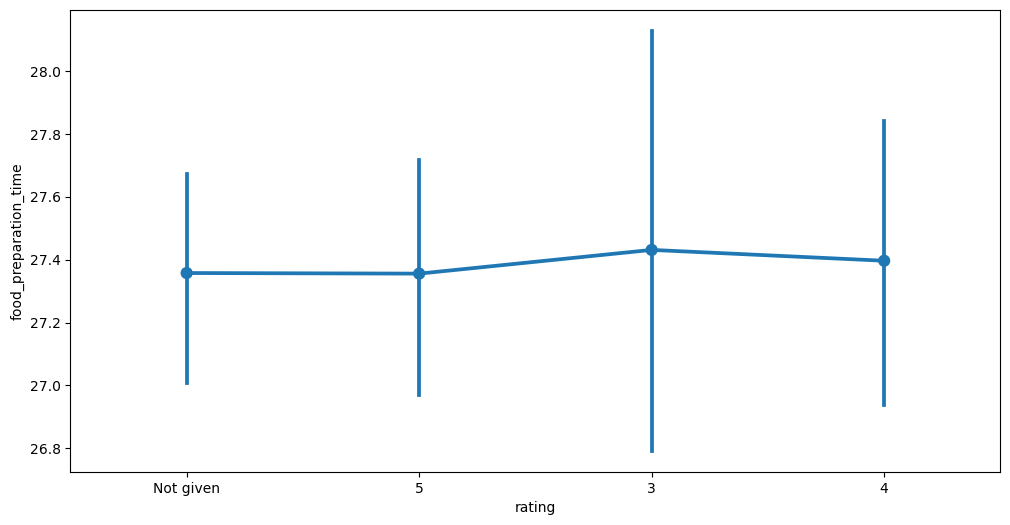

In [244]:
# Relationship between rating and food preparation time
plt.figure(figsize=(12, 6))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

**Correlation among variables**

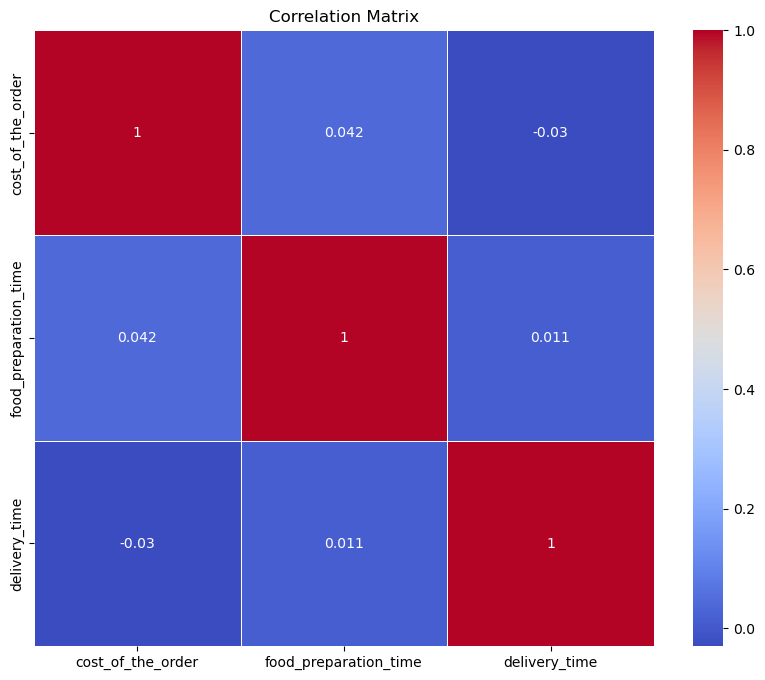

In [245]:
# Plotting a heatmap
plt.figure(figsize=(10, 8))
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[col_list].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Revenue generated by the restaurants**

In [246]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)


restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [247]:
# Filtering the rated restaurants
Rated = df[df['rating'] != 'Not given'].copy()

# Converting rating column from object to integer
Rated['rating'] = Rated['rating'].astype('int')  

# Creating a dataframe that contains the restaurant names with their rating counts
Rating_count = Rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# Restaurants with rating count higher than 50
Higher_than_50 = Rating_count[Rating_count["rating"]>50]
print(Higher_than_50)
Higher_than_50['rating'].mean()

             restaurant_name  rating
0                Shake Shack     133
1          The Meatball Shop      84
2          Blue Ribbon Sushi      73
3  Blue Ribbon Fried Chicken      64


88.5

#### Observations:
Only 4 reastaurants will be provided a promotional offer in their advertisement which are the Shake Shack restaurant,The Meatball Shop restaurant, The Blue Ribbon Sushi restaurant, The Blue Ribbon Fried Chicken restaurant.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [248]:
# Define the function to calculate the commission rate
def net_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0
    
# Apply the function to calculate the commission for each order
df['Revenue'] = df['cost_of_the_order'].apply(net_revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [249]:
# Calculate the total revenue
total_revenue = df['Revenue'].sum()
print("The total revenue generated by the company is:",total_revenue,"dollars")

The total revenue generated by the company is: 6166.303 dollars


#### Observations:
The company does not make any revenue from any orders less than 5 dollars.
The total revenue made by the company is 6,166.303 Dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [250]:
# Calculating the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Checking the number of orders that take more than 60 minutes
orders_over_60_minutes = df[df['total_time'] > 60].shape[0]
# Calculate the total number of orders
total_orders = df.shape[0]
# Calculate the percentage of orders that take more than 60 minutes
percentage = (orders_over_60_minutes / total_orders) * 100
print(percentage)

10.537407797681771


#### Observations:
Only 10% of the orders take more than 60 minutes to get delivered from the time the order is placed. This is in the minority group.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [251]:
# Finding the mean delivery time during the weekdays
print("The mean delivery time during the weekdays is about",round(df[df["day_of_the_week"]=="Weekday"]["delivery_time"].mean()),"minutes")
# Finding the mean delivery time during the weekends
print("The mean delivery time during the weekends is about",round(df[df["day_of_the_week"]=="Weekend"]["delivery_time"].mean()),"minutes")

The mean delivery time during the weekdays is about 28 minutes
The mean delivery time during the weekends is about 22 minutes


#### Observations:
The mean delivery time is higher during the weekdays than the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* We have the top 5 restaurants receiving the highest numbers of orders which should indicate that they are popular or just exceptionally better at customer satisfaction and marketing. 

* We were also able to determine the type of cuisine customers favor most on weekends. This somehow indicates trends of customer preferences toward dining out or ordering in on leisure days. 

* We analyzed the relationship between the customer ratings with the delivery times, and found that the highest ratings are having low delivery times. 

* We calculated the net revenue generated by the company based on the commission from orders and this provided a clear picture of the financial performance. There are restaurants with revenue, obviously way over 1000 dollars and some where the value is fewer than 10 dollars. 

* We also find that more than 60 minutes is needed to deliver the products for about 10% of orders. Such a percentage is also a very crucial statistic in determining efficiency in delivery and the satisfaction of customers. 

### Recommendations:

* The company should try to make the number of orders that take more than 60 minutes drop.The ways to do it would include optimizing the routes used as well as adding the people doing the deliveries because, as shown, faster deliveries get a better customer rating generally. 
 
* They should expand marketing and menu options of the most popular cuisines, particularly those that are liked during weekends.They may also offer specific weekend promotions or combination deals for these types of cuisines. 

* Since restaurants that are qualified to participate in promotional offers will be offered some support, the company should offer them more support. It may advocate for high-rated restaurants because this will enrich the client's trust, which at the same time will attract more orders and benefit both restaurants and the platform. 

* They should continuously analyze the customers' feedback and ratings in order to find out the areas on which the company should work. They should also be answering the common complaints raised by them. 

* The company should retain present customers more often by trying to introduce some kind of loyalty programs when the system stipulates discounts on, or special offers along with, an order depending on certain order history and preferences. 

---